In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "colorama>=0.3.8"

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install future

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o --user

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Note: you may need to restart the kernel to use updated packages.


In [6]:
import h2o

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,37 secs
H2O_cluster_timezone:,Asia/Jerusalem
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_׳¨׳•׳¢׳™_9soams
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.742 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


# 2. Importing Data with H2O in Python

## 2.1. Data Import

In [9]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\רועי'

In [10]:
wine_data = h2o.import_file("C:\\PY\\winequality-white.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
wine_data.head(5)# The default head() command displays the first 10 rows.

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


## 2.2. EDA

In [12]:
wine_data.describe()

Rows:4898
Cols:12




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,real,real,real,real,real,real,real,real,real,real,real,int
mins,3.8,0.08,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0
mean,6.854787668436097,0.27824111882400987,0.33419150673744386,6.391414863209474,0.045772356063699476,35.30808493262556,138.36065741118824,0.9940273764801961,3.1882666394446706,0.489846876276031,10.5142670477746,5.87790935075541
maxs,14.2,1.1,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9.0
sigma,0.8438682276875132,0.10079454842486534,0.12101980420298251,5.072057784014881,0.021847968093728798,17.00713732523259,42.498064554142914,0.0029909069169369393,0.15100059961506673,0.1141258339488323,1.230620567757318,0.8856385749678309
zeros,0,0,19,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr = wine_data.cor().as_data_frame()
corr.index = wine_data.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


<Figure size 1000x1000 with 2 Axes>

# 3. Modeling with H2O

## 3.1. Splitting data into Test and Training sets

In [14]:
wine_split = wine_data.split_frame(ratios = [0.8], seed = 1234) 
wine_train = wine_split[0] # using 80% for training
wine_test = wine_split[1] #rest 20% for testingprint(wine_train.shape, wine_test.shape)

## 3.2. Defining Predictor Variables

In [15]:
predictors = list(wine_data.columns) 
predictors.remove('quality')  # Since we need to predict quality
predictors

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## 3.3. Generalized Linear Model

In [16]:
# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator# Set up GLM for regression
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default')# Use .train() to build the model
glm.train(x = predictors, y = 'quality', training_frame = wine_train)
print(glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 7.744E-4 )",11,11,1,py_4_sid_81fa




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5663260600438998
RMSE: 0.7525463839816785
MAE: 0.5855739117180454
RMSLE: 0.11135798916908808
R^2: 0.28516909778802113
Mean Residual Deviance: 0.5663260600438998
Null degrees of freedom: 3931
Residual degrees of freedom: 3920
Null deviance: 3115.1340284842345
Residual deviance: 2226.794068092614
AIC: 8948.855269434112

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_deviance,training_mae,training_r2
0,,2020-10-13 19:08:45,0.000 sec,0,3115.134028,0.792252,,,,


In [17]:
glm.model_performance(wine_test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.5546397919709445
RMSE: 0.7447414262486978
MAE: 0.5795791157106442
RMSLE: 0.11079661971451729
R^2: 0.26184927981796124
Mean Residual Deviance: 0.5546397919709445
Null degrees of freedom: 965
Residual degrees of freedom: 954
Null deviance: 725.858730540242
Residual deviance: 535.7820390439324
AIC: 2197.9936843132646


## 3.4. Making Predictions

In [18]:
predictions = glm.predict(wine_test)
predictions.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
5.76109
5.76721
5.64325
5.85764
5.77967


# 4. 2OAutoML: Automatic Machine Learning

In [19]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, max_runtime_secs=100, seed = 1)

## 4.1. Training

In [20]:
aml.train(x=predictors, y='quality', training_frame=wine_train, validation_frame=wine_test)

AutoML progress: |█
19:09:06.152: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
19:09:06.190: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%


## 4.2. Leaderboard

In [21]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201013_190906,0.376039,0.61322,0.376039,0.433579,0.0920946
StackedEnsemble_BestOfFamily_AutoML_20201013_190906,0.376823,0.613859,0.376823,0.429186,0.0922581
GBM_grid__1_AutoML_20201013_190906_model_2,0.390259,0.624707,0.390259,0.423369,0.0939443
XRT_1_AutoML_20201013_190906,0.395025,0.62851,0.395025,0.454681,0.0945849
GBM_4_AutoML_20201013_190906,0.418441,0.64687,0.418441,0.48677,0.0967323
GBM_grid__1_AutoML_20201013_190906_model_4,0.419258,0.647501,0.419258,0.476754,0.097125
GBM_grid__1_AutoML_20201013_190906_model_6,0.419451,0.64765,0.419451,0.492594,0.0967172
DRF_1_AutoML_20201013_190906,0.422306,0.649851,0.422306,0.468353,0.0976615
GBM_3_AutoML_20201013_190906,0.423183,0.650525,0.423183,0.497953,0.097283
GBM_2_AutoML_20201013_190906,0.438869,0.662472,0.438869,0.51065,0.0989236


## 4.3. Contribution of Individual Models

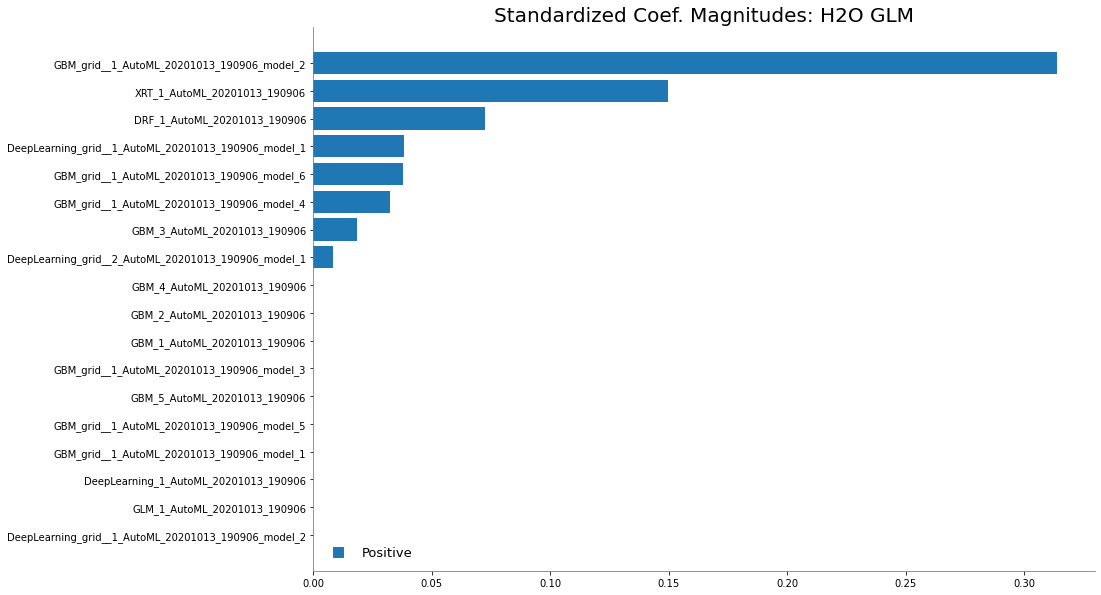

In [22]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

## 4.4. Predictions

In [23]:
preds = aml.leader.predict(wine_test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


## 4.5. Shutting Down

In [24]:
h2o.shutdown()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_81fa closed.
